# Problem 1
## Problem 1a)

In [1]:
import numpy as np
import pandas as pd
import urllib.request as url

dat = url.urlopen("http://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2017/data/ProblemSet2_Prob1.txt").read()
dat = dat.decode("utf-8")
dat = dat.split("\n")
df = pd.DataFrame(dat)
df.columns=['Values']
df = df['Values'].str.split(' ',5,expand=True)
df.columns=['f1','f2', 'f3', 'f4', 'f5']
df = df.drop(df.index[[5000]])

## Column 1:

Define array for column 1:

In [2]:
df['f1'] = pd.to_numeric(df['f1'])
arr1 = np.array(df['f1'])
maxtrue = np.amax(arr1)
maxce = np.ceil(np.amax(arr1))
mintrue = np.amin(arr1)
minfl = np.floor(np.amin(arr1))
#print(maxtrue);print(maxce)
#print(mintrue);print(minfl)

1.99947
2.0
0.000152
0.0


Plot histogram to determine the function:

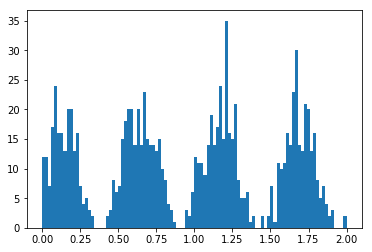

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.hist(arr1[1000:2000],bins=100)
plt.show()

Clearly, this is data sampled from the PDF $\sin(ax+1)^2$ for $a \approx 6$.

In [140]:
np.set_printoptions(threshold=np.nan)

In [4]:
def LLH1(x):
    a = x[0]
    dat = list()
    for x in arr1[2100:2200]: #Different intervals completely change the parameter estimate.
        val = -np.log( ((np.sin(a*x+1))**2)/((1/2)*( (np.cos(1)*np.sin(1)+2*a-np.cos(2*a+1)*np.sin(2*a+1)) /a )) )
        dat.append(val)
    return np.sum(dat);

from scipy.optimize import minimize

x0 = np.array([5])
res = minimize(LLH1,x0)
print('Parameter estimate:', res.x)
print('Parameter uncertainty:', res.hess_inv)

Parameter estimate: [ 5.96185442]
Parameter uncertainty: [[ 0.00276476]]


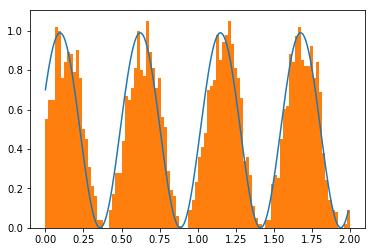

In [23]:
xplotvals = np.arange(0, 2, 0.01)
a=5.96185442
y0 = ((np.sin(a*xplotvals+1))**2)/((1/2)*( (np.cos(1)*np.sin(1)+2*a-np.cos(2*a+1)*np.sin(2*a+1)) /a ))
plt.plot(xplotvals,y0)
plt.hist(arr1,bins=100,normed=True)

fig1 = plt.gcf()

plt.show()

fig1.savefig('col1.eps', dpi=1200)

Parameter error is the square roots of the diagonal elements of the inverse of the Hessian, so parameter error is $0.05$.

Next, we calculate the chi-squared goodness of fit:

In [148]:
#Values from the histogram
y, x, _ = plt.hist(arr1,bins=100,normed=True)
xvals = list()
for i in range((len(x)-1)):
    val = (x[i]+x[i+1])/2
    xvals.append(val)
yvals = list()
a=5.96185442
for i in range(len(xvals)):
    val = ((np.sin(a*xvals[i]+1))**2)/((1/2)*( (np.cos(1)*np.sin(1)+2*a-np.cos(2*a+1)*np.sin(2*a+1)) /a ))
    yvals.append(val)
chicalc = list()
for i in range(len(y)):
    val = ((y[i]-yvals[i])**2)/yvals[i]
    chicalc.append(val)
print(sum(chicalc))

6.57142502022


Using scipy:

In [133]:
from scipy.stats import chisquare
test = chisquare(y, yvals)
print(test.statistic)

6.57142502022


Calculate the $p$-value by integrating the chi-square distribution from $\chi^2_{\text{min}}$ to $\infty$ for $n_{\text{d}}=100-1$ degrees of freedom: 

In [27]:
import scipy.integrate as integrate
from scipy.stats import chi2

res = integrate.quad(lambda x: chi2.pdf(x,99), 6.57, np.inf)
res[0]

0.9999999999999791

The fit is good.

## Column five:

In [8]:
df['f5'] = pd.to_numeric(df['f5'])
arr5 = np.array(df['f5'])
maxtrue = np.amax(arr5)
maxce = np.ceil(np.amax(arr5))
mintrue = np.amin(arr5)
minfl = np.floor(np.amin(arr5))
#print(maxtrue);print(maxce)
#print(mintrue);print(minfl)

9.999879
10.0
1.000164
1.0


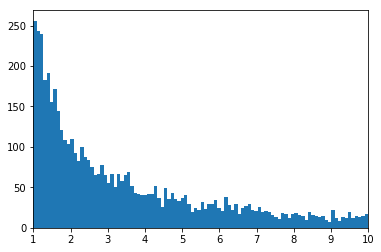

In [123]:
import matplotlib.pyplot as plt

plt.hist(arr5,bins=100)
plt.xlim(1, 10)
plt.show()

This looks like a Poisson or exponential decay. The decay doesn't seem to be fast enough to be exponential (e.g. half-life changes throughout).

In [124]:
def LLH5(x):
    a = x[0]
    dat = list()
    for x in arr5:
        val = -np.log( (x**a)/((10*(2**a)*(5**a)-1)/(a+1))   )
        dat.append(val)
    return sum(dat);

from scipy.optimize import minimize

x0 = np.array([0.5])
res = minimize(LLH5,x0)
print('Parameter estimate:', res.x)
print('Parameter uncertainty:', res.hess_inv)

Parameter estimate: [-1.34026691]
Parameter uncertainty: [[ 0.00046706]]


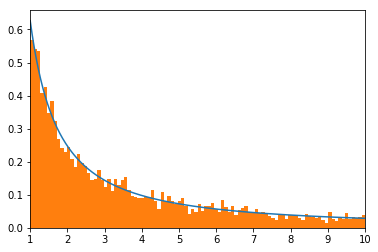

In [26]:
xplotvals = np.arange(1, 10, 0.01)
y0 = ( (xplotvals**(-1.34026691))/((10*(2**(-1.34026691))*(5**(-1.34026691))-1)/((-1.34026691)+1)) )
plt.plot(xplotvals,y0)
plt.hist(arr5,bins=100,normed=True)
plt.xlim(1,10)

fig1 = plt.gcf()

plt.show()

fig1.savefig('col5.eps', dpi=1200, bbox_inches='tight')

Parameter error is the square roots of the diagonal elements of the inverse of the Hessian, so parameter error is $0.02$.

Chi-square goodness-of-fit:

In [138]:
#Values from the histogram
y, x, _ = plt.hist(arr5,bins=100,normed=True)
xvals = list()
for i in range((len(x)-1)):
    val = (x[i]+x[i+1])/2
    xvals.append(val)
yvals = list()
for i in range(len(xvals)):
    val = ( (xvals[i]**(-1.34026691))/((10*(2**(-1.34026691))*(5**(-1.34026691))-1)/((-1.34026691)+1)) )
    yvals.append(val)
chicalc = list()
for i in range(len(y)):
    val = ((y[i]-yvals[i])**2)/yvals[i]
    chicalc.append(val)
print(sum(chicalc))

0.238253098198


In [28]:
import scipy.integrate as integrate
from scipy.stats import chi2

res = integrate.quad(lambda x: chi2.pdf(x,99), 0.2383, np.inf)
res[0]

0.9999999999999765

The fit is good.